In [ ]:
!sudo apt update
!sudo apt install -y build-essential
%pip install Cython
%pip install youtokentome
%pip install einops

In [ ]:
from gpt import *
import numpy as np
import youtokentome as yttm
import matplotlib.pyplot as plt
import random, re

In [ ]:
tokenizer = yttm.BPE('wikitext-103-tokenizer.model')
model = GPT(768, 16, 8, 512, tokenizer.vocab_size()).cuda()
model.load_state_dict(torch.load('WikiGPT.pt', map_location='cuda'))
device = torch.device('cuda')

<All keys matched successfully>

In [ ]:
def generate(model, tokenizer, text_prompt, max_length=50, temperature=1.0):
    tokens = tokenizer.encode(text_prompt)
    input_ids = torch.tensor(tokens).unsqueeze(0).to(device)
    
    print(text_prompt, end='')
    decoded_tokens = []
    with torch.no_grad():
        for _ in range(max_length):
            logits, As = model(input_ids)
            probs = F.softmax(logits[0, -1] / temperature, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1)
            input_ids = torch.cat((input_ids, next_token.unsqueeze(0)), dim=1)
            decoded_token = re.sub(
                '▁', ' ', tokenizer.id_to_subword(next_token.item())
            )
            decoded_tokens.append(decoded_token)
            print(
                decoded_token,
                end=''
            )

    return decoded_tokens, As

In [ ]:
def plot_attention_matrix(attention_matrix, tokens, fontsize=10):
    plt.figure(figsize=(12, 12))
    plt.imshow(attention_matrix, cmap="viridis")
    plt.xticks(range(len(tokens)), tokens, rotation=90, fontsize=fontsize)
    plt.yticks(range(len(tokens)), tokens, fontsize=fontsize)
    
    plt.show()

In [ ]:
prompt = 'Group theory is a field in mathematics where'
max_length = 128
temperature = 1
decoded_tokens, As = generate(model, tokenizer, prompt, max_length, temperature)

Group theory is a field in mathematics where infinity is the absolute value of the … number . The possible formulae continue to show how infinity can be defined in terms of infinitely many other concepts such as particle @-@ choosing , particle @-@ creator @-@ choice ( Hobby , Tie @-@ Buster ) , finite @-@ dimensional laboratory ( Pozey and Horace herbies ) , Mantra @-@ Ali Alvarez , proper and contrary to the " transforming continuity " concept . Others view contingency rational proved by simplified assumptions . For simplicity , differential calculus and infinite canon do not include memorand

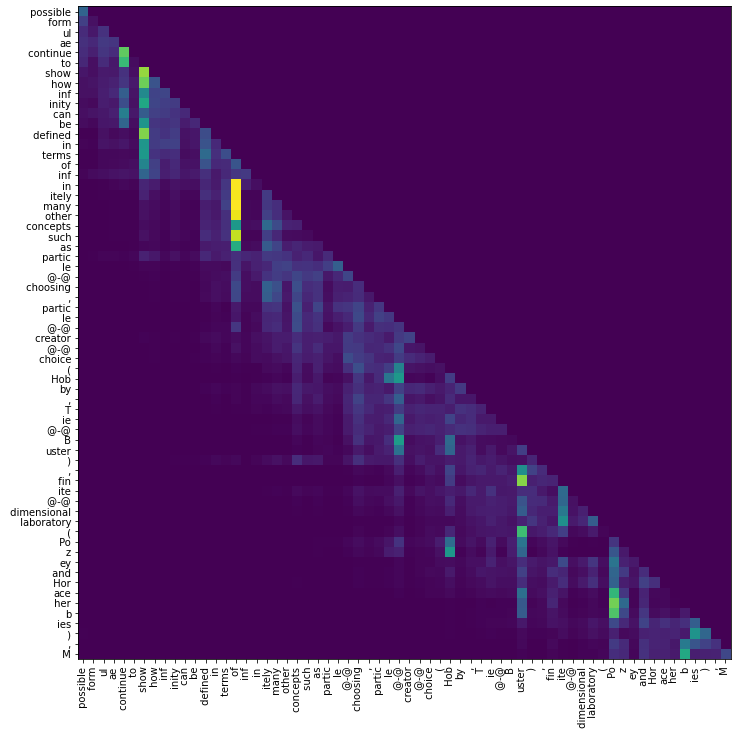

In [ ]:
start, end = 12, 76
layer, head = 2, 4
font_size = 10
plot_attention_matrix(
    As[layer][head, start:end, start:end], decoded_tokens[start:end], font_size
)